In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r"C:\Users\revan\Downloads\apple_stock.csv")

In [5]:
data.head()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,1980-12-12,0.098834,0.128348,0.128906,0.128348,0.128348,469033600
1,1980-12-15,0.093678,0.121652,0.122210,0.121652,0.122210,175884800
2,1980-12-16,0.086802,0.112723,0.113281,0.112723,0.113281,105728000
3,1980-12-17,0.088951,0.115513,0.116071,0.115513,0.115513,86441600
4,1980-12-18,0.091530,0.118862,0.119420,0.118862,0.118862,73449600


In [19]:
data.tail()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
11102,2024-12-27,255.589996,255.589996,258.700012,253.059998,257.829987,42355300
11103,2024-12-30,252.199997,252.199997,253.500000,250.750000,252.229996,35557500
11104,2024-12-31,250.419998,250.419998,253.279999,249.429993,252.440002,39480700
11105,2025-01-02,243.850006,243.850006,249.100006,241.820007,248.929993,55558000
11106,2025-01-03,243.860001,243.860001,244.179993,241.889999,243.369995,15135053


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11107 entries, 0 to 11106
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11107 non-null  object 
 1   Adj Close   11107 non-null  float64
 2   Close       11107 non-null  float64
 3   High        11107 non-null  float64
 4   Low         11107 non-null  float64
 5   Open        11107 non-null  float64
 6   Volume      11107 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 607.5+ KB


In [23]:
data.describe()

,Adj Close,Close,High,Low,Open,Volume
count,11107.000000,11107.000000,11107.000000,11107.000000,11107.000000,1.110700e+04
mean,23.522229,24.357607,24.598169,24.092608,24.339076,3.154341e+08
std,49.767881,50.217498,50.691902,49.682631,50.166818,3.348735e+08
min,0.037815,0.049107,0.049665,0.049107,0.049665,0.000000e+00
25%,0.243402,0.300290,0.306362,0.292411,0.300090,1.111164e+08
50%,0.446682,0.542411,0.553393,0.534598,0.542679,2.036944e+08
75%,18.260086,21.397143,21.569285,21.115715,21.367679,3.960418e+08
max,259.019989,259.019989,260.100006,257.630005,258.190002,7.421641e+09


In [25]:
data.shape

(11107, 7)

In [27]:
data.columns

Index(['Unnamed: 0', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [29]:
data["Low"].value_counts()

Low
0.357143      51
0.352679      42
0.366071      38
0.343750      35
0.348214      35
              ..
6.018929       1
5.886786       1
5.955714       1
6.009643       1
241.889999     1
Name: count, Length: 6344, dtype: int64

In [31]:
data.isnull()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
11102,False,False,False,False,False,False,False
11103,False,False,False,False,False,False,False
11104,False,False,False,False,False,False,False
11105,False,False,False,False,False,False,False


In [7]:
data.isna().sum()

Unnamed: 0    0
Adj Close     0
Close         0
High          0
Low           0
Open          0
Volume        0
dtype: int64

In [9]:
target_column = 'Close'
X = data.drop(target_column, axis=1)  # Use the variable `target_column` here
y = data[target_column]  # Use the variable `target_column` here

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
print(X_train.dtypes)

Unnamed: 0     object
Adj Close     float64
High          float64
Low           float64
Open          float64
Volume          int64
dtype: object


In [ ]:
print(X_train.columns)
print(X_test.columns)

In [19]:
X_train['Unnamed: 0'] = pd.to_datetime(X_train['Unnamed: 0'])
X_train['Unnamed: 0'] = X_train['Unnamed: 0'].map(pd.Timestamp.toordinal)
X_test['Unnamed: 0'] = pd.to_datetime(X_test['Unnamed: 0'])
X_test['Unnamed: 0'] = X_test['Unnamed: 0'].map(pd.Timestamp.toordinal)

In [21]:
X_train = pd.get_dummies(X_train, columns=['Unnamed: 0'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Unnamed: 0'], drop_first=True)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [111]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [113]:
print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Model Evaluation:
Mean Squared Error: 0.08257550554699357
R-squared: 0.9999643847678009


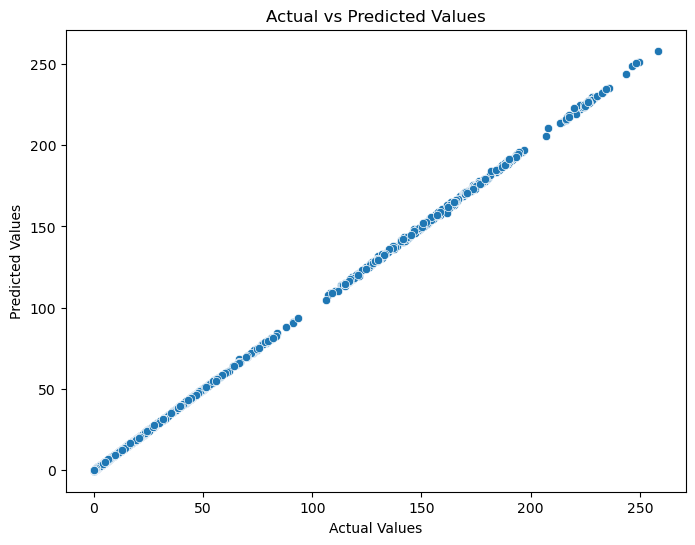

In [115]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

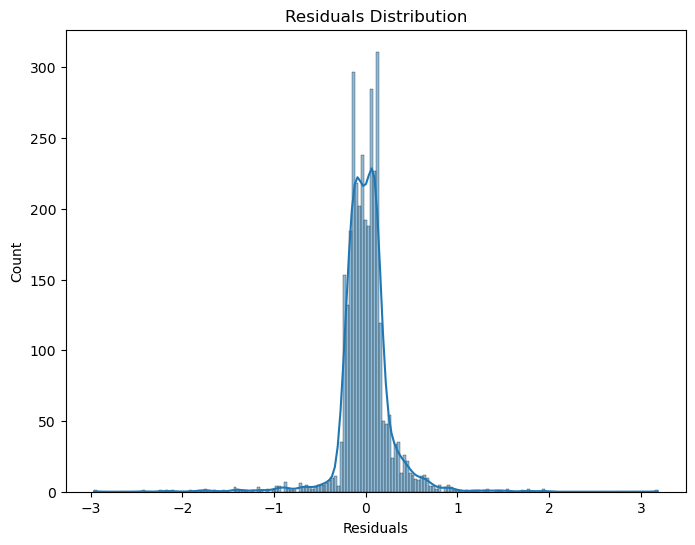

In [117]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

In [119]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
      Feature   Coefficient
2        High  6.486580e-01
3         Low  5.956523e-01
1   Adj Close  2.313125e-01
0  Unnamed: 0  5.125285e-05
5      Volume -1.470115e-10
4        Open -4.772947e-01
